<a href="https://colab.research.google.com/github/fatimaknz/-FDS-LAbWork/blob/main/FDS_EDA_Rectangular_rollNo_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis-Rectangular Data

In [ ]:
installations

In [ ]:
pip install wquantiles


  Created wheel for wquantiles: filename=wquantiles-0.5-cp37-none-any.whl size=2509 sha256=41da60a8aeccafdc34f736a09d66cb31e0f90395840aa214f5ab8149834f1858
  Stored in directory: /root/.cache/pip/wheels/24/61/20/f9e1b00d1697d793c1b423cecbdb40fc65dd29a6188e78af41
Successfully built wquantiles


Import required Python packages.

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


mounting

In [ ]:
#Mounting Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
Location = "/content/gdrive/MyDrive/cardio_data.csv"
df = pd.read_csv(Location)
df.head()


,Id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#Estimates of Height and weight

Compute the mean, trimmed mean, and median for Height & Wieght. For mean and median we can use the pandas methods of the data frame. The trimmed mean requires the trim_mean function in scipy.stats.

In [ ]:
print(df['height'].mean())

164.0126939351199


In [ ]:
print(trim_mean(df['height'], 0.1))

163.95957820738138


In [ ]:
print(df['height'].median())

164.0


In [ ]:
print(df['weight'].mean())

74.42919605077574


In [ ]:
print(np.average(df['weight'], weights=df['height']))

74.71242378638689


Weighted mean is available with numpy. For weighted median, we can use the specialised package wquantiles

In [ ]:
print(wquantiles.median(df['weight'], weights=df['height']))

72.0


#Estimates of Variability

Standard deviation

In [ ]:
print(df['height'].std())

8.633210556457215



Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [ ]:
print(df['height'].quantile(0.75) - df['height'].quantile(0.25))

12.0


Median absolute deviation from the median can be calculated with a method in statsmodels

In [ ]:
print(robust.scale.mad(df['height']))
print(abs(df['height'] - df['height'].median()).median() / 0.6744897501960817)

8.895613311033612
8.895613311033612


#Percentiles and Boxplots
Pandas has the quantile method for data frames.

In [ ]:
print(df['weight'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     54.0
0.25     64.0
0.50     72.0
0.75     84.0
0.95    100.0
Name: weight, dtype: float64


In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df1 = pd.DataFrame(df['weight'].quantile(percentages))
df1.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

                 0        1        2    ...      706      707      708
Id               0.0      1.0      2.0  ...    997.0    999.0   1000.0
age          18393.0  20228.0  18857.0  ...  22547.0  21250.0  22446.0
gender           2.0      1.0      1.0  ...      1.0      1.0      1.0
height         168.0    156.0    165.0  ...    161.0    157.0    158.0
weight          62.0     85.0     64.0  ...     93.0     68.0     65.0
ap_hi          110.0    140.0    130.0  ...    140.0    110.0    140.0
ap_lo           80.0     90.0     70.0  ...     90.0     80.0     90.0
cholesterol      1.0      3.0      3.0  ...      2.0      1.0      3.0
gluc             1.0      1.0      1.0  ...      1.0      1.0      1.0
smoke            0.0      0.0      0.0  ...      0.0      0.0      0.0
alco             0.0      0.0      0.0  ...      0.0      0.0      0.0
active           1.0      1.0      0.0  ...      1.0      1.0      1.0
cardio           0.0      1.0      1.0  ...      1.0      0.0      1.0

[13 r

Pandas provides a number of basic exploratory plots; one of them are boxplots

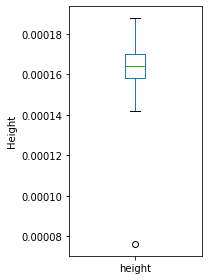

In [ ]:
ax = (df['height']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Height')

plt.tight_layout()
plt.show()

#Frequency Table and Histograms
The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [ ]:
binnedHeight = pd.cut(df['height'], 10)
print(binnedHeight.value_counts())

(154.4, 165.6]    343
(165.6, 176.8]    245
(143.2, 154.4]     75
(176.8, 188.0]     44
(132.0, 143.2]      1
(75.888, 87.2]      1
(120.8, 132.0]      0
(109.6, 120.8]      0
(98.4, 109.6]       0
(87.2, 98.4]        0
Name: height, dtype: int64


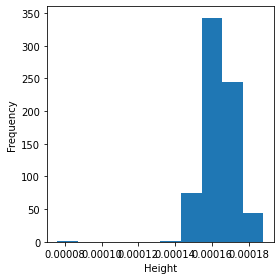

In [ ]:
ax = (df['height'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Height')

plt.tight_layout()
plt.show()

#Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument bw_method to control the smoothness of the density curve.

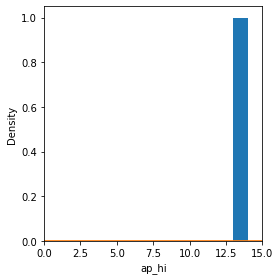

In [ ]:
ax = df['ap_hi'].plot.hist(density=True, xlim=[0, 15], 
                                    bins=range(1,15), figsize=(4, 4))
df['ap_hi'].plot.density(ax=ax)
ax.set_xlabel('ap_hi')

plt.tight_layout()
plt.show()

In [ ]:
dfn1 = df[['height','weight']]
dfn1.head()

,height,weight
0,168,62.0
1,156,85.0
2,165,64.0
3,169,82.0
4,156,56.0


In [ ]:
dfn2 = df[['ap_hi','ap_lo']]
dfn2.head()

,ap_hi,ap_lo
0,110,80
1,140,90
2,130,70
3,150,100
4,100,60


#Exploring Binary and Categorical Data

In [ ]:
print(100 * dfn1 / dfn1.values.sum())

       height    weight
0    0.099376  0.036674
1    0.092277  0.050279
2    0.097601  0.037857
3    0.099967  0.048505
4    0.092277  0.033125
..        ...       ...
704  0.097010  0.036083
705  0.095827  0.042590
706  0.095235  0.055012
707  0.092869  0.040224
708  0.093461  0.038449

[709 rows x 2 columns]


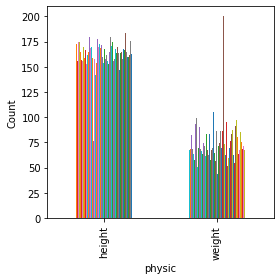

In [ ]:
ax = dfn1.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('physic')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#Correlation
correlation matrix

In [ ]:
data=df.corr()
print(data)

                   Id       age    gender  ...      alco    active    cardio
Id           1.000000 -0.026904 -0.071267  ...  0.021380  0.016990 -0.036547
age         -0.026904  1.000000  0.001430  ... -0.074528 -0.007464  0.236791
gender      -0.071267  0.001430  1.000000  ...  0.175032 -0.032629 -0.038012
height      -0.043734 -0.106335  0.469850  ...  0.120415 -0.064885  0.010605
weight       0.034737 -0.016563  0.136394  ...  0.058611 -0.047885  0.144348
ap_hi       -0.021004  0.179657  0.052524  ...  0.022570 -0.061009  0.470492
ap_lo        0.050002  0.008331 -0.005155  ... -0.020349 -0.026069  0.148786
cholesterol -0.012113  0.167047  0.012778  ...  0.004204  0.029864  0.263982
gluc         0.042034  0.060398  0.045508  ... -0.012010  0.041643  0.112270
smoke       -0.006029 -0.053418  0.392524  ...  0.398841  0.033214 -0.043377
alco         0.021380 -0.074528  0.175032  ...  1.000000 -0.003719 -0.024014
active       0.016990 -0.007464 -0.032629  ... -0.003719  1.000000 -0.042987

The seaborn package provides a convenient implementation for heatmaps.

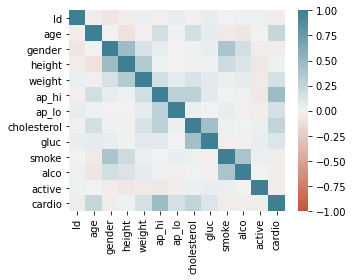

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

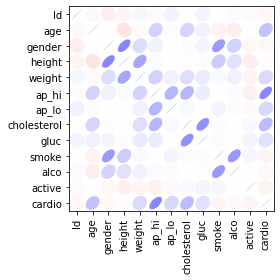

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
  
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(df.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

#Scatterplots
Simple scatterplots are supported by pandas. Specifying the marker as $\u25EF$ uses an open circle for each point.

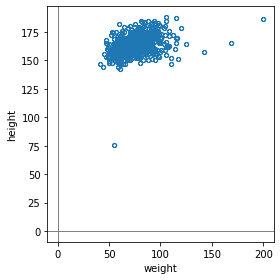

In [ ]:
ax = dfn1.plot.scatter(x='weight', y='height', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('weight')
ax.set_ylabel('height')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


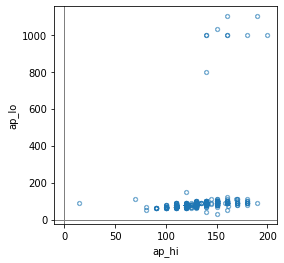

In [ ]:
ax = dfn2.plot.scatter(x='ap_hi', y='ap_lo', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ap_hi')
ax.set_ylabel('ap_lo')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

#Hexagonal binning and Contours
Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

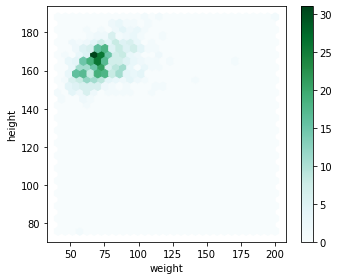

In [ ]:
ax = dfn1.plot.hexbin(x='weight', y='height',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('weight')
ax.set_ylabel('height')

plt.tight_layout()
plt.show()

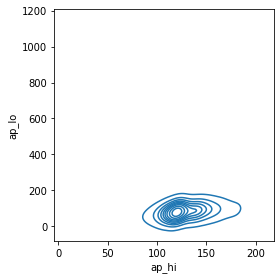

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=dfn2, x='ap_hi', y='ap_lo', ax=ax)
ax.set_xlabel('ap_hi')
ax.set_ylabel('ap_lo')

plt.tight_layout()
plt.show()

#Two Categorical Variables
Load the AirQuality dataset

In [ ]:
Location = "/content/gdrive/MyDrive/airquality.csv"
df1 = pd.read_csv(Location)
df1.head()

,Ozone,Solar,Wind,Temp,PM25,PM10,Index,Month,Day
0,41.0,190.0,7.4,67.0,159.0,125.0,2.0,5,1
1,36.0,118.0,8.0,72.0,55.0,63.0,2.0,5,2
2,12.0,149.0,12.6,74.0,36.0,116.0,9.0,5,3
3,18.0,313.0,11.5,62.0,120.0,128.0,9.0,5,4
4,NaN,NaN,14.3,56.0,134.0,119.0,1.0,5,5


In [40]:
crosstab = df1.pivot_table(index='Month', columns='Temp', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

       Day                                ... Wind                               
Temp  56.0 57.0 58.0 59.0 61.0 62.0 63.0  ... 91.0 92.0 93.0 94.0 96.0 97.0   All
Month                                     ...                                    
5      1.0  3.0  2.0  2.0  3.0  2.0  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  21.0
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  1.0  1.0  NaN  NaN  NaN   7.0
7      NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  2.0  NaN  NaN  NaN  NaN  23.0
8      NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  1.0  NaN  2.0  1.0  1.0  20.0
9      NaN  NaN  NaN  NaN  NaN  NaN  1.0  ...  1.0  NaN  2.0  NaN  NaN  NaN  24.0
All    NaN  1.0  1.0  1.0  2.0  2.0  1.0  ...  1.0  2.0  2.0  2.0  NaN  1.0  95.0

[6 rows x 287 columns]


#Categorical and Numeric Data
Pandas boxplots of a column can be grouped by a different column.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


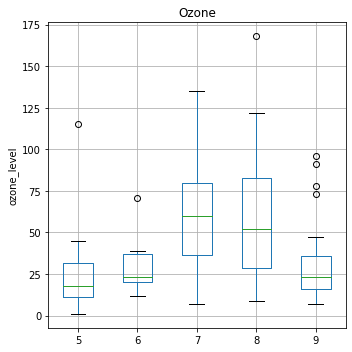

In [ ]:
ax = df1.boxplot(by='Month', column='Ozone',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('ozone_level')
plt.suptitle('')

plt.tight_layout()
plt.show()

Pandas also supports a variation of boxplots called violinplot.

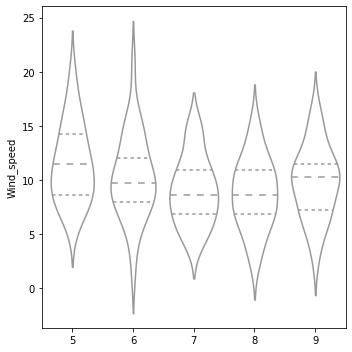

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=df1, x='Month', y='Wind',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Wind_speed')

plt.tight_layout()
plt.show()